In [342]:
#Classifying loans that will default
#I will be prepping the data so that it can be run through several supervised machine learning algorithms in the attempt
#to see which dimension influence delinquency or default

In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

%matplotlib inline

In [431]:
from sklearn.preprocessing import Imputer

In [432]:
from sklearn.preprocessing import _function_transformer

In [433]:
#from sklearn.preprocessing import imputation

In [434]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [435]:
x = pd.read_excel('x.xlsx')
#y = pd.read_excel('y.xlsx')

In [436]:
x(0,1)

TypeError: 'DataFrame' object is not callable

In [437]:
#y = pd.DataFrame(y)
x = pd.DataFrame(x)   

In [440]:
x.describe()

,Account_Number,San Juan,Alpharetta,Bronx,Laurel,Type,North,South,East,West,...,adj_61-90_day_count,adj>60_days,adj>60_day_count,adj_91-120_days,adj_91-120_day_count,>120_days,adj>120_days,adj>120_day_count,adj_>60_day,adj_2011_default
count,3.690000e+02,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,...,369.0,369.000000,369.0,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,4.604026e+06,0.457995,0.352304,0.162602,0.027100,0.178862,0.205962,0.336043,0.186992,0.271003,...,0.0,0.444444,0.0,76.200298,0.162602,803.914173,1013.816775,0.525745,0.647696,0.897019
std,3.071865e+06,0.498909,0.478337,0.369503,0.162596,0.383757,0.404952,0.472995,0.390434,0.445081,...,0.0,0.497579,0.0,316.510708,0.369503,2581.614694,2506.421984,0.500015,0.478337,0.304347
min,5.440000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,-8684.170000,0.000000,0.000000,0.000000,0.000000
25%,1.643919e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.548153e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,17.000000,1.000000,1.000000,1.000000
75%,7.295494e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.0,1.000000,0.0,0.000000,0.000000,340.000000,441.500000,1.000000,1.000000,1.000000
max,9.932987e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,0.0,3810.000000,1.000000,24165.560000,24165.560000,1.000000,1.000000,1.000000


In [442]:
x.type()

AttributeError: 'DataFrame' object has no attribute 'type'

In [438]:
x[0,1]

TypeError: 'DataFrame' object is not callable

In [439]:
#x = pd.DataFrame(data=x[:,:], 
   #              index= x[1:,0],
 #                columns = x[0,1:])

In [417]:
x.shape


(369, 54)

In [422]:
x[0][1]

KeyError: 0

In [419]:
y.shape

(369, 1)

In [421]:
np.array

<function numpy.core.multiarray.array>

In [418]:
x.head()


,Account_Number,San Juan,Alpharetta,Bronx,Laurel,Type,North,South,East,West,...,adj_61-90_day_count,adj>60_days,adj>60_day_count,adj_91-120_days,adj_91-120_day_count,>120_days,adj>120_days,adj>120_day_count,adj_>60_day,adj_2011_default
0,544,0,1,0,0,0,0,1,0,0,...,0,0,0,0.0,0,0.00,0.00,0,0,1
1,26283,1,0,0,0,0,0,0,0,1,...,0,1,0,0.0,0,180.00,180.00,1,1,1
2,34994,1,0,0,0,0,0,0,0,1,...,0,1,0,0.0,0,95.00,95.00,1,1,1
3,52014,1,0,0,0,0,0,0,1,0,...,0,0,0,0.0,0,0.00,0.00,0,0,0
4,59438,0,1,0,0,1,0,1,0,0,...,0,0,0,0.0,0,-31.15,31.15,1,1,1


In [ ]:
y = x.iloc

In [352]:
y.head()

,adj_2011_default
0,1
1,1
2,1
3,0
4,1


In [353]:
#x = x[:, [1, 9]]



In [354]:
#y = x[:,51]

In [355]:
x['Type'].dtype


dtype('int64')

In [356]:
y['adj_2011_default'].dtype

dtype('int64')

In [357]:
print(x['Type'].head())


0    0
1    0
2    0
3    0
4    1
Name: Type, dtype: int64


In [358]:
#x['Type'] = (x['Non Legacy'] == 0).astype('int64')

In [359]:
#x.values[:,6] = labelencoder.fit_transform(x.values[:,6])

In [360]:
#onehotencoder = OneHotEncoder(categorical_features = [6])
#x = onehotencoder.fit_transform(x).toarray()

In [361]:
 #x.columns.tolist()  
    #this does not work with numpy.ndarray s
    

In [362]:
 list( loan.columns.values)

['Account_Number',
 'Customer',
 'Customer_Name',
 'Status',
 'OSC',
 'OSC_dummy',
 'Type',
 'type_dummy',
 'Region',
 'region_dummy',
 'Industry',
 'industry_dummy',
 'Customer_Est_date',
 'year',
 'month',
 'dayofweek',
 'weekofyear',
 'day',
 'Last_Pmt_Dt',
 'Pmt_dummy',
 'Credit_Limit',
 'Overdue_Amount',
 'adj_2011_overdue_amount',
 'Not_Due_Amount',
 'Over_Credit_Limit',
 'Credit_Line_Utilization',
 'adj_credit_line_Utilization',
 'Last_Pmt_Amt',
 'Default',
 'adj_2011_default',
 'call_report_deliquent',
 'adj_2011_call_report_deliquent',
 'Outstanding_Amount',
 'adj_outstanding_amt',
 '1-30_days',
 '1-30_day_count',
 'adj_1-30_days',
 'adj_1-30_day_count',
 '31-60_days',
 '31-60_day_count',
 '61-90_days',
 '61-90_day_count',
 '>60_day',
 '91-120_days',
 '91-120_day_count',
 '>120_days',
 '>120_day_count',
 'Adj_>60_day']

In [363]:
 y.columns.tolist()

['adj_2011_default']

In [364]:
df = x[['Account_Number',
 'San Juan',
 'Alpharetta',
 'Bronx',
 'Laurel',
 'Type',
 'North',
 'South',
 'East',
 'West',
 'Technology',
 'Logistics',
 'Retail',
 'Services',
 'Manufacturing',
 'Telco',
 'Finance',
 'year',
 'month',
 'dayofweek',
 'weekofyear',
 'day',
 'Pmt_year',
 'Pmt_Month',
 'Pmt_dayoftheweek',
 'Pmt_weekoftheyear',
 'Pmt_day',
 'Pmt_dummy',
 'Credit_Limit',
 'adj_2011_overdue_amount',
 'Not_Due_Amount',
 'adj_Over_Credit_Limit',
 'adj_credit_line_Utilization',
 'Last_Pmt_Amt',
 'adj_2011_call_report_deliquent',
 'adj_outstanding_amt',
 '1-30_days',
 '1-30_day_count',
 'adj_1-30_days',
 'adj_1-30_day_count',
 '31-60_days',
 'adj_31-60_days',
 'adj_31-60_day_count',
 'adj_61-90_days',
 'adj_61-90_day_count',
 'adj>60_days',
 'adj>60_day_count',
 'adj_91-120_days',
 'adj_91-120_day_count',
 '>120_days',
 'adj>120_days',
 'adj>120_day_count',
 'adj_>60_day',
 'adj_2011_default']]

In [365]:
print(set(df.Type))

{0, 1}


In [366]:
print(set(df.West))

{0, 1}


In [367]:
print(set(df.Finance))

{0, 1}


In [368]:
print(set(df.Credit_Limit))

{20000, 60000, 5000, 25000, 45000, 65000, 10000, 50000, 90000, 15000, 35000}


In [369]:
df.describe()

,Account_Number,San Juan,Alpharetta,Bronx,Laurel,Type,North,South,East,West,...,adj_61-90_day_count,adj>60_days,adj>60_day_count,adj_91-120_days,adj_91-120_day_count,>120_days,adj>120_days,adj>120_day_count,adj_>60_day,adj_2011_default
count,3.690000e+02,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,...,369.0,369.000000,369.0,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,4.604026e+06,0.457995,0.352304,0.162602,0.027100,0.178862,0.205962,0.336043,0.186992,0.271003,...,0.0,0.444444,0.0,76.200298,0.162602,803.914173,1013.816775,0.525745,0.647696,0.897019
std,3.071865e+06,0.498909,0.478337,0.369503,0.162596,0.383757,0.404952,0.472995,0.390434,0.445081,...,0.0,0.497579,0.0,316.510708,0.369503,2581.614694,2506.421984,0.500015,0.478337,0.304347
min,5.440000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,-8684.170000,0.000000,0.000000,0.000000,0.000000
25%,1.643919e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.548153e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,17.000000,1.000000,1.000000,1.000000
75%,7.295494e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.0,1.000000,0.0,0.000000,0.000000,340.000000,441.500000,1.000000,1.000000,1.000000
max,9.932987e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,0.0,3810.000000,1.000000,24165.560000,24165.560000,1.000000,1.000000,1.000000


In [370]:
#sns.pairplot(x,palette='Dark2', dropna = True)

In [371]:
#Creating a dataframe of the target variable
#df_target = pd.DataFrame(df['Default'],columns=['Default'])

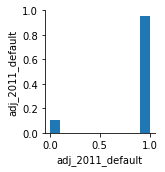

In [372]:
sns.pairplot(y)

In [373]:
from sklearn.preprocessing import RobustScaler

In [374]:
robust_scaler = RobustScaler()

In [398]:
xdf = x.iloc[:,:].values

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [399]:
xdf.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,-0.804662,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,-0.038505,-1.0,-1.0,0.0
1,-0.800108,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.529412,0.369196,0.0,0.0,0.0
2,-0.798567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.279412,0.176670,0.0,0.0,0.0
3,-0.795555,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,-0.038505,-1.0,-1.0,-1.0
4,-0.794241,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.091618,0.032050,0.0,0.0,0.0


In [400]:
xdf = robust_scaler.fit_transform(x)

In [401]:
ydf.describe()

,0
count,369.000000
mean,0.897019
std,0.304347
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [402]:
from sklearn.model_selection import train_test_split

In [403]:
X_train, X_test, y_train, y_test = train_test_split(
    xdf, ydf, test_size=0.30, random_state=101

SyntaxError: unexpected EOF while parsing (<ipython-input-403-8a5680a913a1>, line 2)

In [407]:
X_train, X_test, y_train, y_test = train_test_split(
    xdf, np.ravel(ydf), test_size=0.30, random_state=101

SyntaxError: unexpected EOF while parsing (<ipython-input-407-ed529d2006a6>, line 2)

In [381]:
X_train, X_test, y_train, y_test = train_test_split(
    ghx, np.ravel(y), test_size=0.30, random_state=101

SyntaxError: unexpected EOF while parsing (<ipython-input-381-28e495e5d626>, line 2)

In [382]:
from sklearn.svm import SVC

In [383]:
model = SVC()

In [384]:
model.fit(X_train,y_train)

C:\Users\Jerimiah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)